In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def find_bins(observations, width):
    minimmum = np.min(observations)
    maximmum = np.max(observations)
    bound_min = -1.0 * (minimmum % width - minimmum)
    bound_max = maximmum - maximmum % width + width
    n = int((bound_max - bound_min) / width) + 1
    bins = np.linspace(bound_min, bound_max, n)
    return bins

Selecionando arbovirose

In [3]:
Arbo_V = 'Dengue'
Ano = '2021'

In [34]:
bahia = gpd.read_file("../Datasets/Map/Map.shp")
df = pd.read_pickle("../Datasets/dengue_ano.pkl")
censo = pd.read_pickle('../Datasets/ibge_2010.pkl')

In [35]:
df = df.merge(censo, left_on='Município', right_on='Município')
df = df.merge(bahia, left_on='Município', right_on='Município')
df.drop(columns='CODIGO', inplace=True)
df = gpd.GeoDataFrame(df)
df[df.columns[2:-2]] = df[df.columns[2:-2]].astype('int32')

In [36]:
df.head()

,Código,Município,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,População 2010,geometry
0,290010,Abaíra,1,1,159,1,3,1,4,3,2,2,1,8316,"POLYGON ((-41.65334 -13.16869, -41.65311 -13.1..."
1,290020,Abaré,4,4,0,4,22,27,6,0,226,321,2,17064,"POLYGON ((-39.35347 -8.54508, -39.34996 -8.548..."
2,290030,Acajutiba,28,16,8,8,44,0,0,0,47,45,3,14653,"POLYGON ((-38.04970 -11.58322, -38.04949 -11.5..."
3,290035,Adustina,119,331,64,109,34,71,8,21,96,40,9,15702,"POLYGON ((-37.99556 -10.43288, -37.99529 -10.4..."
4,290040,Água Fria,14,21,34,0,12,3,1,4,95,106,1,15731,"POLYGON ((-38.64818 -11.69015, -38.64804 -11.6..."


In [37]:
nc = math.ceil( 1 + 3.322 * math.log(len(df), 10) )
intervalo = []
for i in range (nc):
    intervalo.append(df[f'{Ano}'].quantile(nc * i/100))
intervalo = sorted(set(intervalo))

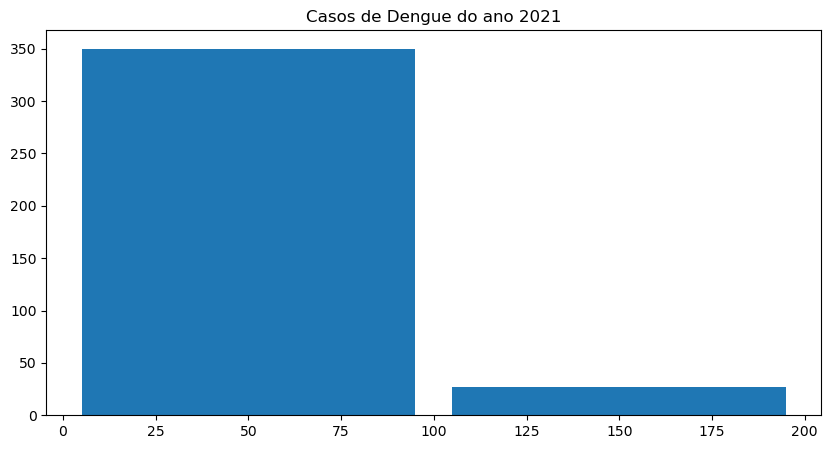

In [38]:
fig = plt.figure(figsize=(10, 5))

if Arbo_V == 'Dengue':
    plt.title(f'Casos de Dengue do ano {Ano}')
elif Arbo_V == 'Chikungunya':
    plt.title(f'Casos de Chikungunya do ano {Ano}')
else:
    plt.title(f'Casos de Zika Vírus do ano {Ano}')

plt.hist(df[f'{Ano}'], bins = find_bins(intervalo, 100), rwidth=0.9)

plt.show()
# plt.savefig(f'../media/{Arbo_V.value}/georef_hist_{Ano}.png', bbox_inches='tight', pad_inches=0)

Plotagem automatica

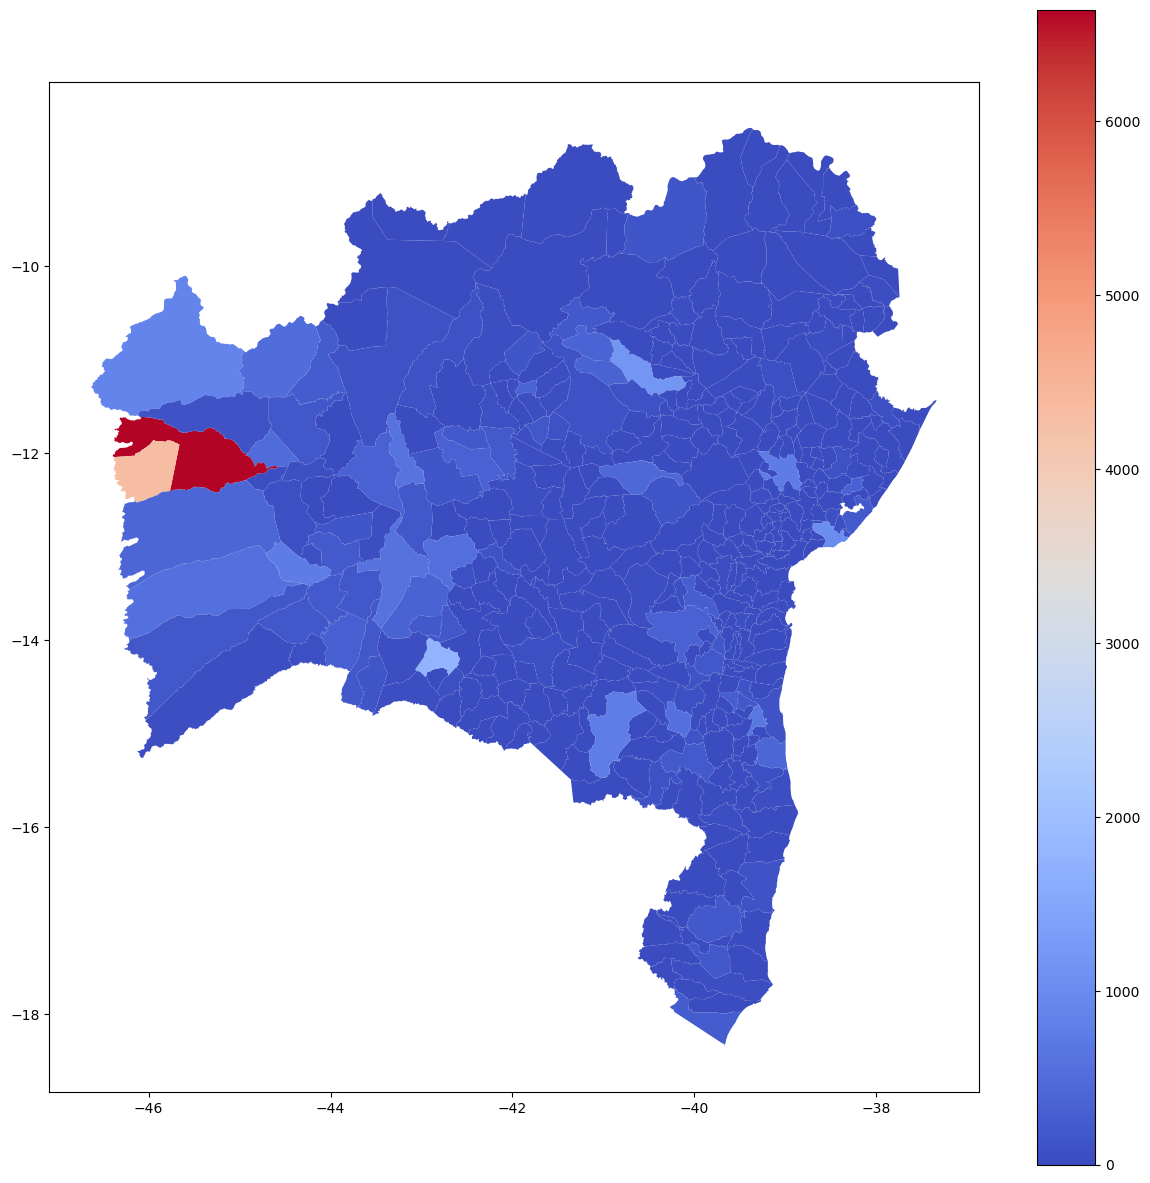

In [41]:
df.plot(column=f"{Ano}", cmap='coolwarm', linewidth=1, legend=True, figsize=(15, 15))

plt.show()
# plt.savefig(f'../media/{arbo_v.value}/georef_auto_{ano_plotado.value}.png', bbox_inches='tight', pad_inches=0)

<AxesSubplot: >

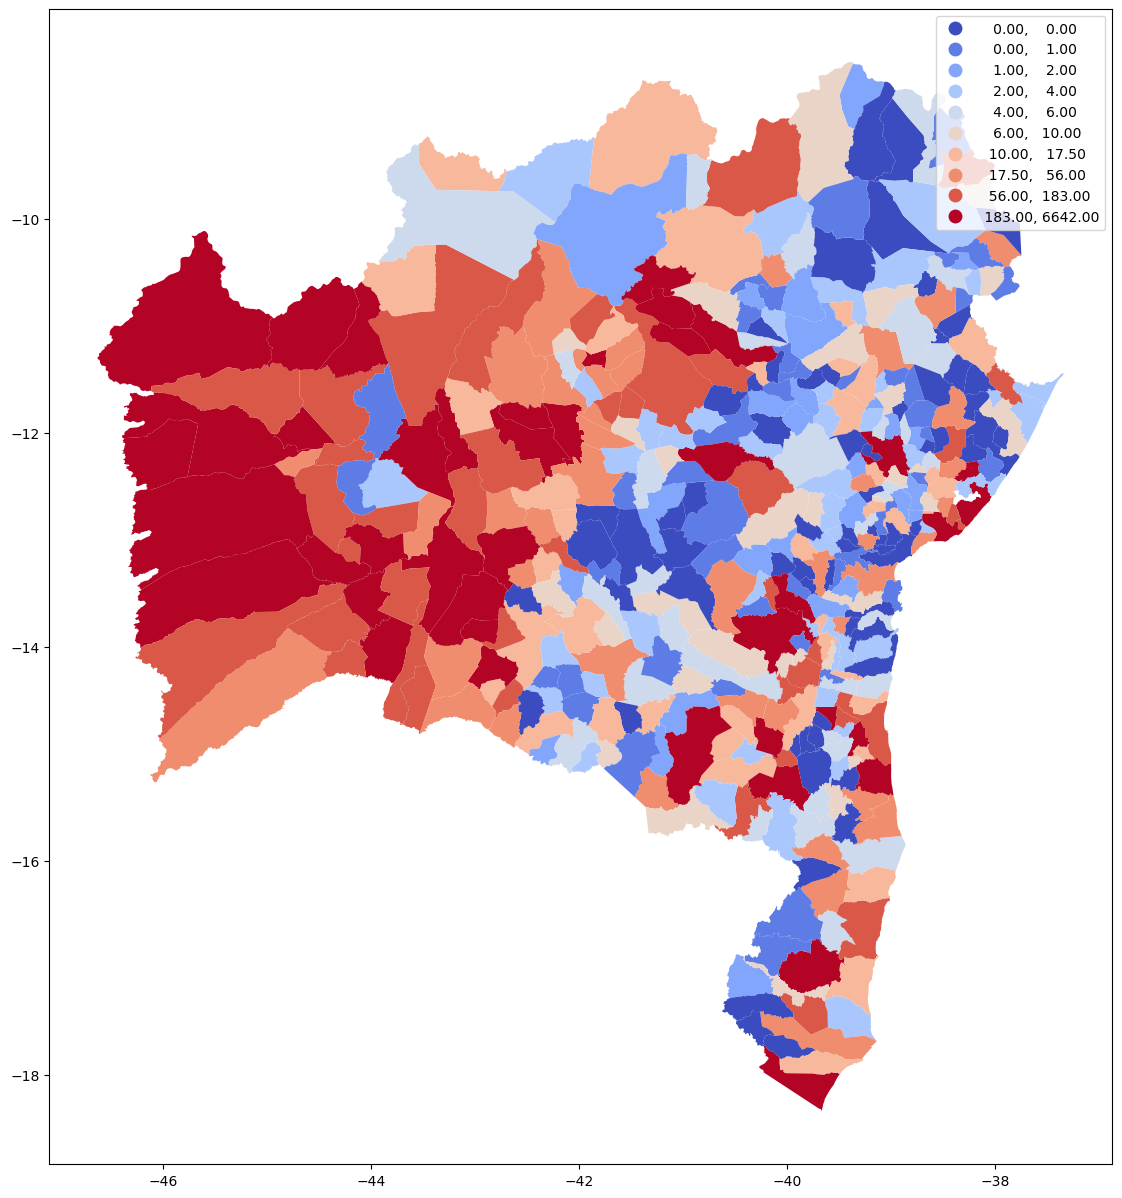

In [42]:
df.plot(column=f"{Ano}", scheme='user_defined', classification_kwds={'bins':intervalo}, cmap='coolwarm', linewidth=1, legend=True, figsize=(15, 15))
# plt.savefig(f'../media/{Arbo_V}/georef_sturges_{Ano}.png', bbox_inches='tight', pad_inches=0)

In [44]:
df['Casos/Hab 100M'] = (df[f'{Ano}']/df["População 2010"]*100000)
df['Casos/Hab 100M'] = df['Casos/Hab 100M'].astype('float32').round(2)

intervalo = []
for i in range (nc):
    intervalo.append(df["Casos/Hab 100M"].quantile(nc * i/100))

intervalo = sorted(set(intervalo))

<AxesSubplot: >

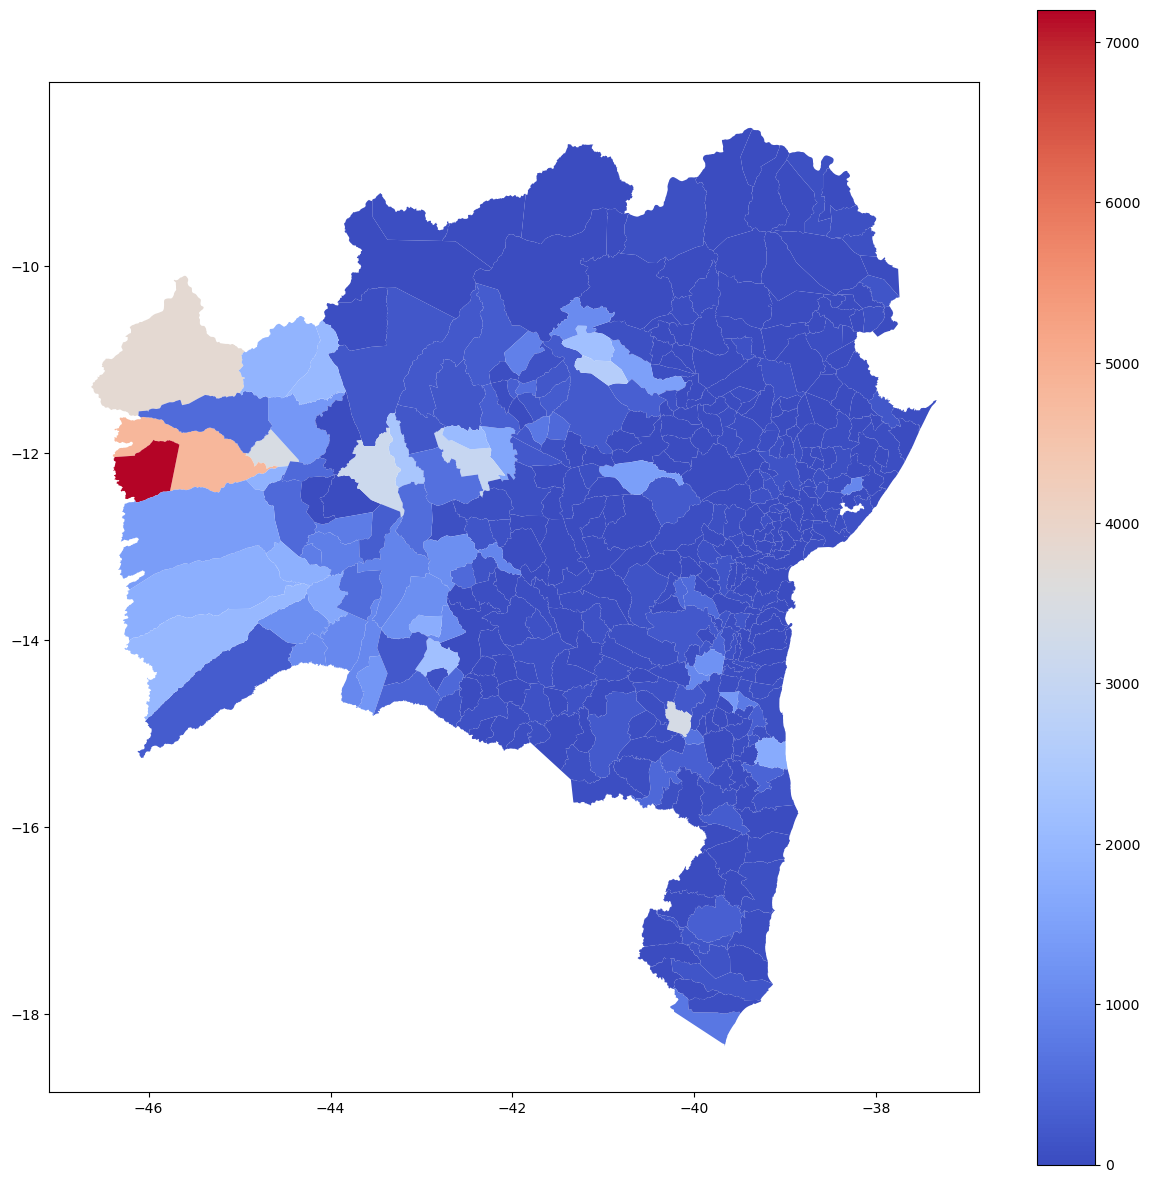

In [46]:
df.plot(column="Casos/Hab 100M", cmap='coolwarm', linewidth=1, legend=True, figsize=(15, 15))

<AxesSubplot: >

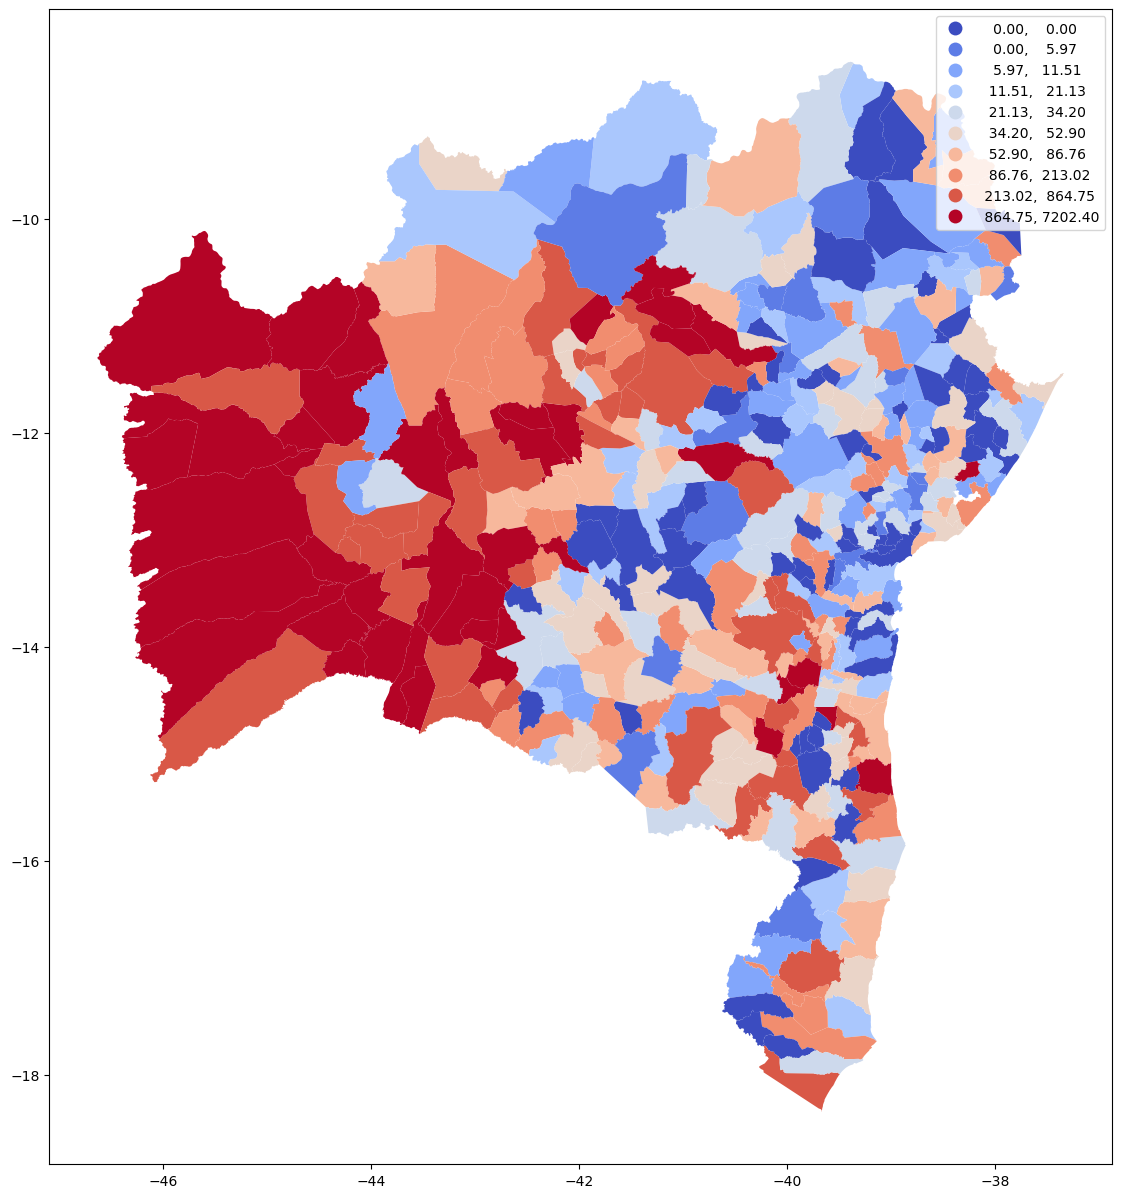

In [47]:
df.plot(column="Casos/Hab 100M", scheme='user_defined', classification_kwds={'bins':intervalo}, cmap='coolwarm', linewidth=1, legend=True, figsize=(15, 15))
# plt.savefig(f'../media/{arbo_v.value}/Casos/Hab 100M_{ano_plotado.value}.png', bbox_inches='tight', pad_inches=0)